<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-加载数据" data-toc-modified-id="1-加载数据-1">1 加载数据</a></span><ul class="toc-item"><li><span><a href="#1.2-数据规范化" data-toc-modified-id="1.2-数据规范化-1.1">1.2 数据规范化</a></span></li><li><span><a href="#1.3-数据集拆分" data-toc-modified-id="1.3-数据集拆分-1.2">1.3 数据集拆分</a></span><ul class="toc-item"><li><span><a href="#1.3.1-数组转张量" data-toc-modified-id="1.3.1-数组转张量-1.2.1">1.3.1 数组转张量</a></span></li></ul></li><li><span><a href="#1.3.2-target改为2维：" data-toc-modified-id="1.3.2-target改为2维：-1.3">1.3.2 target改为2维：</a></span><ul class="toc-item"><li><span><a href="#1.3.3-拆分数据集" data-toc-modified-id="1.3.3-拆分数据集-1.3.1">1.3.3 拆分数据集</a></span></li></ul></li></ul></li><li><span><a href="#2-搭建模型" data-toc-modified-id="2-搭建模型-2">2 搭建模型</a></span><ul class="toc-item"><li><span><a href="#2.1-定义3层模型实例" data-toc-modified-id="2.1-定义3层模型实例-2.1">2.1 定义3层模型实例</a></span></li><li><span><a href="#2.2-定义损失函数" data-toc-modified-id="2.2-定义损失函数-2.2">2.2 定义损失函数</a></span></li><li><span><a href="#2.3-定义优化器-Adam" data-toc-modified-id="2.3-定义优化器-Adam-2.3">2.3 定义优化器-Adam</a></span></li></ul></li><li><span><a href="#3-训练模型" data-toc-modified-id="3-训练模型-3">3 训练模型</a></span></li><li><span><a href="#4--loss可视化" data-toc-modified-id="4--loss可视化-4">4  loss可视化</a></span></li><li><span><a href="#5-测试" data-toc-modified-id="5-测试-5">5 测试</a></span><ul class="toc-item"><li><span><a href="#5.1-获取测试结果数组" data-toc-modified-id="5.1-获取测试结果数组-5.1">5.1 获取测试结果数组</a></span></li><li><span><a href="#5.2-预测值与真实值可视化" data-toc-modified-id="5.2-预测值与真实值可视化-5.2">5.2 预测值与真实值可视化</a></span></li></ul></li><li><span><a href="#6-总结" data-toc-modified-id="6-总结-6">6 总结</a></span></li></ul></div>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# os.chdir("/content/drive/My Drive/Colab Notebooks/")

In [3]:
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null !apt-get update -qq 2>&1 > /dev/null !apt-get -y install -qq google-drive-ocamlfuse fuse from google.colab import auth auth.authenticate_user() from oauth2client.client import GoogleCredentials creds = GoogleCredentials.get_application_default() import getpass !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} &1 | grep URL vcode = getpass.getpass() !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [4]:
!/opt/bin/nvidia-smi

Sun Oct  4 09:29:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    19W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Action1:
使用Pytorch编写神经网络，完成boston房价预测问题    
1）数据加载：`from sklearn.datasets import load_boston  `   
2）网络结构：
```
l1 = Linear(X, W1, b1)
s1 = Relu(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)
````
隐藏层维度为10

In [5]:
import torch 
import numpy as np
from torch import nn
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# 1 加载数据

In [6]:
boston = load_boston()
X = boston.data
y = boston.target

In [7]:
X.shape, y.shape

((506, 13), (506,))

In [8]:
type(X), X.min(), X.max()

(numpy.ndarray, 0.0, 711.0)

## 1.2 数据规范化

In [9]:
# 最大最小归一化
# transfer = MinMaxScaler()
# 标准化
transfer = StandardScaler()
X = transfer.fit_transform(X)

## 1.3 数据集拆分

### 1.3.1 数组转张量

In [10]:
# 从数组转为张量，并调整数据类型
# X数据类型需要是float32，目标值回归模型也需要float32
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)

## 1.3.2 target改为2维：

In [11]:
y = y.reshape(-1, 1)

In [12]:
X.shape, X.ndim, y.shape, y.ndim

(torch.Size([506, 13]), 2, torch.Size([506, 1]), 2)

### 1.3.3 拆分数据集

In [13]:
# 数据集切分
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [14]:
x_train.shape, y_train.shape

(torch.Size([379, 13]), torch.Size([379, 1]))

In [15]:
x_test.shape, y_test.shape

(torch.Size([127, 13]), torch.Size([127, 1]))

# 2 搭建模型
---
## 2.1 定义3层模型实例

`nn.Linear(in_features, out_features, bias=True)`

In [16]:
model = nn.Sequential(
    # 输入13，隐藏层16
    nn.Linear(13, 10),
    # 激活层
    nn.ReLU(),
    # 隐藏层->输出
    nn.Linear(10, 1)
)

In [17]:
# 假如存在GPU环境，则把模型和数据集送入GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

## 2.2 定义损失函数 

In [18]:
# 定义损失函数
criterion = nn.MSELoss()

criterion

MSELoss()

## 2.3 定义优化器-Adam

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.8, 0.9))
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.8, 0.9)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

# 3 训练模型

In [20]:
# criterion?

In [21]:
%%time
# 循环次数
EPOCH = 2200
# 绘图起始epoch
plot_start_epoch = 500
losses = []
for e in range(EPOCH):
    # 清空之前梯度
    optimizer.zero_grad()
    # 使用神经网络前向传播
    y_pred = model.forward(x_train)
    # 计算loss，一般预测值在前，真实值在后
    cost = criterion(y_pred, y_train)
    # cost是单值张量，可以用item提取数值
    losses.append(cost.item())
    # 反向传播
    cost.backward()
    # 参数学习
    optimizer.step()

CPU times: user 2.45 s, sys: 78.9 ms, total: 2.53 s
Wall time: 2.58 s


# 4  loss可视化

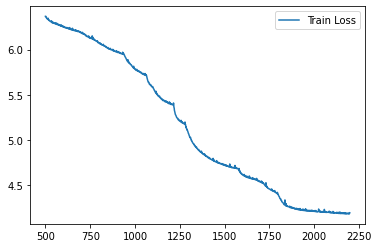

In [22]:
# 返回Line2D对象，可用于legend函数为该对象指定图例名称
data = plt.plot(range(EPOCH)[plot_start_epoch:], losses[plot_start_epoch:])
plt.legend(data, ['Train Loss'])
plt.show()

In [23]:
type(data), type(data[0])

(list, matplotlib.lines.Line2D)

In [24]:
np.array(losses).argmin(), np.array(losses).min()

(2192, 4.183244228363037)

In [25]:
losses[-1]

4.195528984069824

# 5 测试 
---
## 5.1 获取测试结果数组

In [26]:
model.eval() # 进入测试模式

output = model(x_test)

In [27]:
output.type(), output.shape

('torch.cuda.FloatTensor', torch.Size([127, 1]))

In [28]:
output[:1]

tensor([[15.6657]], device='cuda:0', grad_fn=<SliceBackward>)

In [29]:
# output.grad_fn # AddmmBackward对象

In [30]:
predict = output.detach()  # 返回不需要计算梯度的张量

In [31]:
predict.type(), predict.shape

('torch.cuda.FloatTensor', torch.Size([127, 1]))

In [32]:
y_test_pred = output.to('cpu').data.numpy()
y_test_pred[:5]

array([[15.665672],
       [ 7.327577],
       [18.971645],
       [29.994526],
       [15.416315]], dtype=float32)

In [33]:
y_test = y_test.cpu().data.numpy()
y_test[:5]

array([[19.6],
       [10.5],
       [19.3],
       [29.9],
       [15.2]], dtype=float32)

## 5.2 预测值与真实值可视化

In [34]:
y_test.max()

50.0

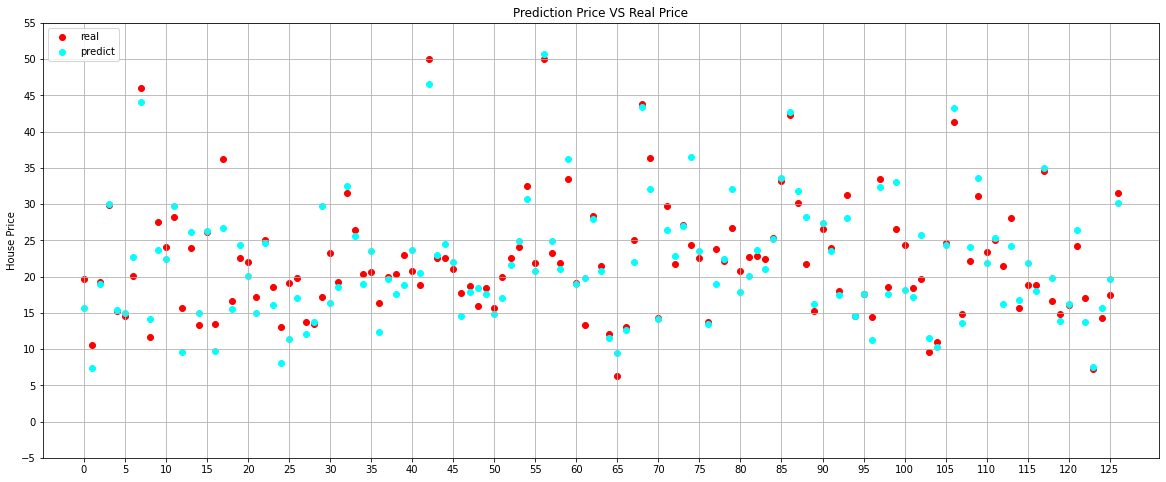

In [35]:
x = np.arange(x_test.shape[0])

plt.figure(figsize=(20, 8))
line1 = plt.scatter(x, y_test, c='red')
line2 = plt.scatter(x, y_test_pred, c='cyan')
# 刻度轴
plt.xlim(-5, x[-1]+5)
plt.ylim(-5, y_test.max()+5)
# 设置x坐标轴间隔
plt.xticks(x[::5])
# 2条坐标轴实例
ax=plt.gca()
width = plt.MultipleLocator(5)
# 设置y坐标轴间隔
ax.yaxis.set_major_locator(width)
# 图例
plt.legend([line1, line2], ['real', 'predict'], loc=2)
# 网格
plt.grid()
# 添加描述信息
plt.title('Prediction Price VS Real Price')
plt.ylabel('House Price')
plt.show()

In [36]:
type(line1)

matplotlib.collections.PathCollection

# 6 总结

1. 首先，特征张量的精度需要调整为FloatTensor，即32位浮点数；目标值张量回归模型中也需要是FloatTensor；
2. 其次，目标值张量必须从1维调整成2维；
3. 原本我认为，训练集的特征都是正数，那数据规范的方式是不是最大最小归一化更适合？但通过比较，在标准化后的MSE反而更小，所以不能单纯以数据集是正数就简单的决定用最大最小归一化；
4. 使用GPU时，模型实例、训练集张量、测试集张量都需要`.to(device)`。刚开始没有把测试集放进去，在用模型对测试集进行预测后，测试结果在转numpy时会报`RuntimeError: CUDA error: an illegal memory access was encountered`，只有事先`.to(device)`后，才不会报这个错；
5. 对回归模型的预测结果进行散点图进行可视化这个方法不错，非常直观。当然在可视化的过程中，一定要注意由于xy轴刻度不同，以及图像尺寸所导致的错觉；可以通过指定坐标轴刻度及刻度间隔、调整图像尺寸比例等来让可视化的结果接近真实情况。